# Stock Market Index Prediction using Time-series and Daily News Text Analysis
The Kaggle's dataset contains 8 years of daily Dow Jones Industy Averages (DJIA) closing index and daily news headlines to predict stock market index movement.  

The analysis will be two-fold: predicting index using time-series forecasting with adjusted closing prices and also using the daily news to do a classification of whether the index has increased or decreased. I will be comparing different time series techniques in the first part of the analysis and will do the same with different text analysis techniques in the second part of the project.

This notebook is dedicated to the initial part of the analysis where I load the data, combine data sources, do any clean-up necessary and finally do some exploratory data analysis. The dataset is pretty straight forward since it is composed of index metrics such as price and volume and daily news headlines, so the exploratory review of the data will be limited.

There are two separate datasets: one for stock index metrics and one for daily news headlines. First, we will look at the index metrics file and then review headlines file, and finally, we will combind both to create a final combined dataset for our analysis.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

## 1) Load and Review the first dataset (Stock Index Prices)

In [6]:
# Read the 'upload_DJIA_table' CSV data file from the data directory into dataframe
# This is the DJIA file that contains each day's stock index data (Open, Close, Volume, etc.) 
DJIA_data = pd.read_csv('data/upload_DJIA_table.csv')
DJIA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [7]:
# It doesnt look like we have any null data in this dataset
# # Let's confirm that we don't have any null values 
DJIA_data.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [8]:
# Shape of our dataset
# There are 1989 observations (rows) and 7 features (columns)
DJIA_data.shape

(1989, 7)

In [9]:
# Top 5 records of the dataset
DJIA_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [10]:
# Last 5 records of the dataset
DJIA_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


We can see that the data is listed descending by Date, so we will need to rectify that later.

In [11]:
# Now, let's check the date range of the dataset
# The dataset ranges from '2008-08-08' to '2016-07-01', approximately 8 years worth of data
DJIA_data['Date'].min(), DJIA_data['Date'].max()

('2008-08-08', '2016-07-01')

In [12]:
# Check the data type of Date: it is a string object
DJIA_data['Date'].dtype

dtype('O')

In [13]:
# We want to change the Date column to a datetime data type and set the index of dataset to Date 
DJIA_data['Date'] = pd.to_datetime(DJIA_data['Date'])

DJIA_data = DJIA_data.set_index('Date')

In [14]:
DJIA_data.index

DatetimeIndex(['2016-07-01', '2016-06-30', '2016-06-29', '2016-06-28',
               '2016-06-27', '2016-06-24', '2016-06-23', '2016-06-22',
               '2016-06-21', '2016-06-20',
               ...
               '2008-08-21', '2008-08-20', '2008-08-19', '2008-08-18',
               '2008-08-15', '2008-08-14', '2008-08-13', '2008-08-12',
               '2008-08-11', '2008-08-08'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

In [15]:
# Let's look at the dataset after reindexing
DJIA_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


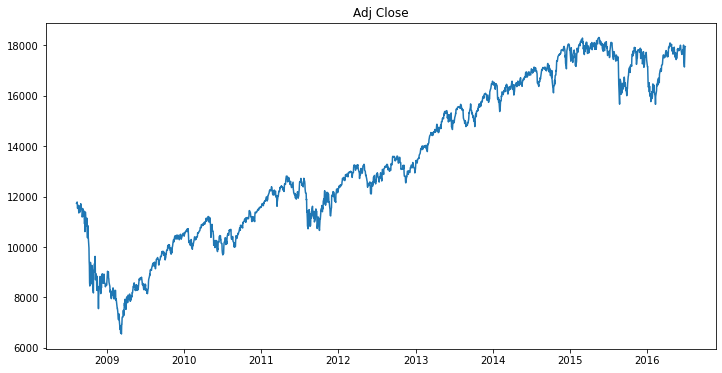

In [16]:
# Let's plot our dataset for Adj Close price
plt.plot(DJIA_data['Adj Close'])
plt.title('Adj Close');

## 2) Load and Review the second dataset (Daily News Headlines)

In [17]:
# This is the daily news dataset including stock index's up and down movement as a label feature
Combined_News_DJIA = pd.read_csv('data/Combined_News_DJIA.csv')
Combined_News_DJIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [18]:
# It looks like we have couple of null values in the last three columns in this dataset
# # Let's confirm that
Combined_News_DJIA.isnull().sum()[-3:]
# I chose not to take action on these non-values because, I will be combining all the headline textx eventually into one cell to be used for further processing

Top23    1
Top24    3
Top25    3
dtype: int64

In [19]:
# Shape of our dataset
# There are 1989 observations (rows) and 27 features (columns) including one Label feature
Combined_News_DJIA.shape

(1989, 27)

In [20]:
# The data range check: It is the same as the first dataset
Combined_News_DJIA['Date'].min(), Combined_News_DJIA['Date'].max()

('2008-08-08', '2016-07-01')

In [21]:
# Check the data type of Date: it is a string object
Combined_News_DJIA['Date'].dtype

dtype('O')

In [22]:
# Change the Date to a datetime data type and set the index of dataset to Date 
Combined_News_DJIA['Date'] = pd.to_datetime(Combined_News_DJIA['Date'])

Combined_News_DJIA = Combined_News_DJIA.set_index('Date')

In [23]:
Combined_News_DJIA.index

DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

In [24]:
# Daily news headlines dataset containes headlines text and the label data that displays whether the stock index price has increased (1) or not (1)
Combined_News_DJIA.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [25]:
Combined_News_DJIA.tail(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


## 3) Combine two datasets

In [26]:
# Number of rows in both dataset match, so we can merge them based on Date and create a combination dataset
comb_data = pd.merge(DJIA_data, Combined_News_DJIA, how='inner', on='Date')

In [27]:
comb_data.head(2)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...


In [28]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2016-07-01 to 2008-08-08
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1989 non-null   float64
 1   High       1989 non-null   float64
 2   Low        1989 non-null   float64
 3   Close      1989 non-null   float64
 4   Volume     1989 non-null   int64  
 5   Adj Close  1989 non-null   float64
 6   Label      1989 non-null   int64  
 7   Top1       1989 non-null   object 
 8   Top2       1989 non-null   object 
 9   Top3       1989 non-null   object 
 10  Top4       1989 non-null   object 
 11  Top5       1989 non-null   object 
 12  Top6       1989 non-null   object 
 13  Top7       1989 non-null   object 
 14  Top8       1989 non-null   object 
 15  Top9       1989 non-null   object 
 16  Top10      1989 non-null   object 
 17  Top11      1989 non-null   object 
 18  Top12      1989 non-null   object 
 19  Top13      1989 non-null   obj

In [29]:
# Shape of our final combined dataset
# There are 1989 observations (rows) and 33 features (columns) including one Label feature
comb_data.shape

(1989, 32)

In [30]:
# Since the dates are reversed in the original dataset (descending order), let's resort the date index to ascending
dataset = comb_data.sort_index(ascending=True, axis=0)

In [31]:
dataset.index

DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

## 4) Saving our combined dataset into our local folder for the modeling phase

In [28]:
import os
datapath = 'data'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [29]:
datapath_combdata = os.path.join(datapath, 'comb_data_final.csv')
if not os.path.exists(datapath_combdata):
    dataset.to_csv(datapath_combdata, index='Date')

In [30]:
dataset.head()

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the product o...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...


## Data Cleaning

Since the dataset is from Kaggle, it was pretty clean in the first place with no missing values and other concerns. The dataset being a time-series data with no missing values, we don't have any issues that we need to consider as we normally do with traditional datasets.

In [28]:
# There are no missing values in the dataset that we need to be concerned excpt for a few news headlines, but no further action is necessary on this front as mentioned earlier. I will combine the headlines into one combo text later in analysis phase.
comb_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        1
Top24        3
Top25        3
dtype: int64

## Exploratory Data Analysis

As I mentioned at the beginning, I do not expect any revealing patterns for the data due its somewhat random nature combined with unknown information about the trends in the data. I will review the numerical and text data separetely here to see if there is any other stats about the data that is worth mentioning.

### 1) Review of the Stock Index Data

In [32]:
# Let's review the descriptive stats for the stock index prices
# First, I will create a copy of the dataset and then calculate the return
# Since the dates are reversed in the original dataset (descending order), let's also sort the date index to ascending
df1 = DJIA_data.copy()
df1 = df1.sort_index(ascending=True, axis=0)

In [33]:
# I would like to look at the daily returns from the stock index separately as well, so I will use the pct_change function accomplish this.
# I will add a return column and plot the daily returns. Daily returns tells us the returns that we obtain in a day after the stock price closes.
df1['Daily_Returns'] = df1['Adj Close'].pct_change()
df1.head()

,Open,High,Low,Close,Volume,Adj Close,Daily_Returns
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,NaN
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004093
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.011872
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.009406
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.007194


In [34]:
# As we can see, the prices and volume values are pretty volatile with large variances in the data.
df1.describe()

,Open,High,Low,Close,Volume,Adj Close,Daily_Returns
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1988.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255,0.000294
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996,0.012650
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,-0.078733
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883,-0.004553
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078,0.000543
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156,0.005748
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625,0.110803


In [37]:
# Let's also calculate the Expected returns (mean) v/s Risk (std)
# Standard deviation is a measure of the risk that an investment will fluctuate from its expected return. however, it is only one way of measuring risk. Below we are only calculating the risk on the daily returns.
# As we can see the average daily return and standard deviation are extremely low suggesting possible losses in daily trades
returns = df1['Daily_Returns']
print(f'Expected return of the Stock Index: {returns.mean():.03}')
print(f'Calculated Risk of the Stock Index: {returns.std():.03}')

Expected return of the Stock Index: 0.000294
Calculated Risk of the Stock Index: 0.0126


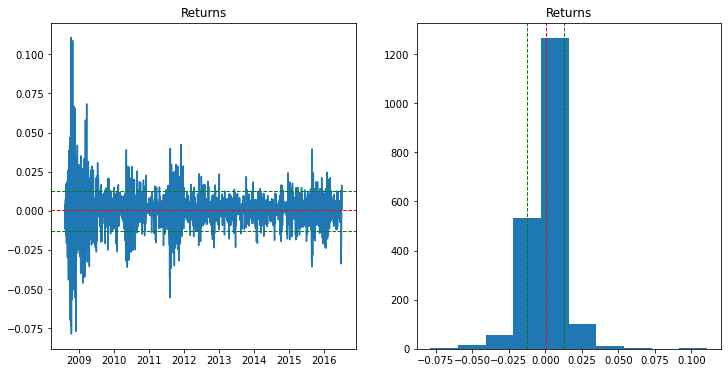

In [39]:
# Let's plot our dataset for daily returns
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(df1['Daily_Returns'])
ax1.set_title('Returns')
ax1.axhline(returns.mean(),color='red',linestyle='dashed',linewidth=1)
# Plot the std lines vertically
ax1.axhline(returns.std(),color='g',linestyle='dashed',linewidth=1)
ax1.axhline(-returns.std(),color='g',linestyle='dashed',linewidth=1)
ax2.hist(df1['Daily_Returns'])
ax2.set_title('Returns')
ax2.axvline(returns.mean(),color='red',linestyle='dashed',linewidth=1)
# Plot the std lines horizontally
ax2.axvline(returns.std(),color='g',linestyle='dashed',linewidth=1)
ax2.axvline(-returns.std(),color='g',linestyle='dashed',linewidth=1)
plt.show()
# As expected, there is no pattern in the data; randomly distributed around 0

In [40]:
# Now let's look at the kurtosis of the daily returns
# Kurtosis tells you the 'fatness' of the tail and tells you how extreme can the values get.
# The kurtosis value is positive, so the chance of extreme values are rare
kurtosis = df1['Daily_Returns'].kurtosis()
print(f'Kurtosis of the daily returns: {kurtosis:.03}')

Kurtosis of the daily returns: 10.9


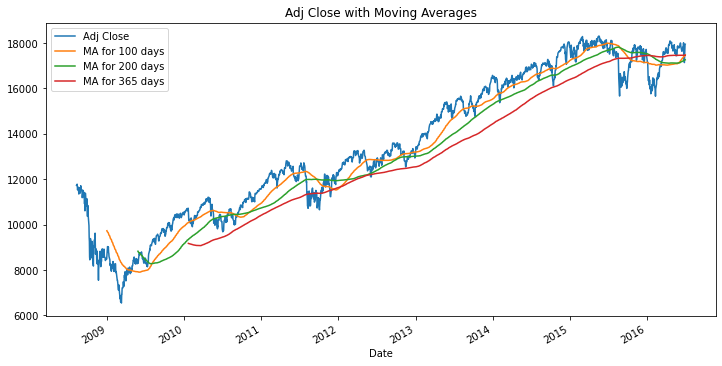

In [41]:
# Now, let's plot our dataset for Adj Close price with the moving averages this time
# Calculating Moving Average with lag of 100, 200 and 365 days.
ma_day = [100, 200, 365]

for ma in ma_day:
    column_name = f'MA for {ma} days'
    df1[column_name] = df1['Adj Close'].rolling(ma).mean()

df1[['Adj Close', 'MA for 100 days', 'MA for 200 days', 'MA for 365 days']].plot()
plt.title('Adj Close with Moving Averages');

# As we increase the MA window size, data gets smoother as expected
# The 2015–2016 stock market selloff was the period of decline in the value of stock prices globally that occurred between June 2015 to June 2016.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

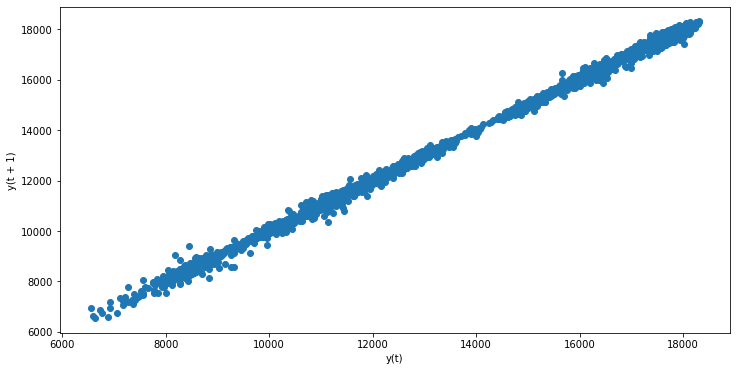

In [42]:
# Let's check to see if the time series data is random or not. If it is randome, we will not be able to much of time series analysis
# We conclude that there is linearity in the lag plot where y value is a function of its lagged value. We can apply autoregressive models to the time series dataset
from pandas.plotting import lag_plot
lag_plot(df1['Adj Close'])

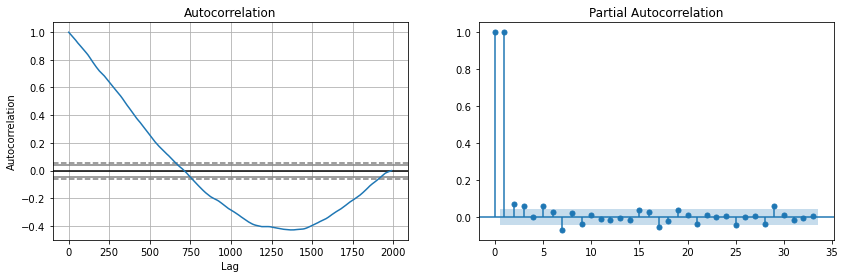

In [43]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

# Let's also review the Autocorrelation and Partial Autocorrelation plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
autocorrelation_plot(df1['Adj Close'], ax = ax1)
ax1.set_title('Autocorrelation')
plot_pacf(df1['Adj Close'], ax = ax2)
plt.show()

# We can see that there is indeed auto-correlation with the prices and their lagged values because we see the ACF shows values outside the confidence bands around 0 indicating variable autocorrelation.

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

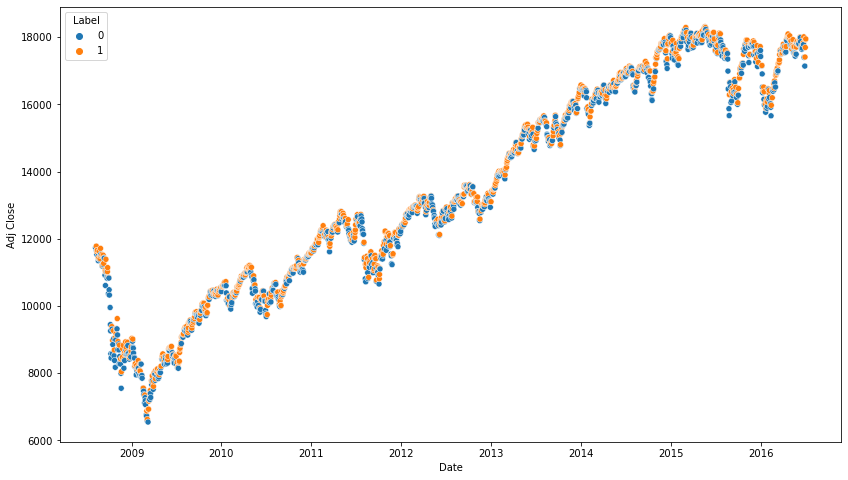

In [44]:
# Finally, let's plot the Adj Close index price and the Label columns as hue
# We can see that the Label (movement of increase/descrease) in the time-series data
plt.figure(figsize=(14,8))
sns.scatterplot(data=dataset, x=dataset.index, y='Adj Close', hue='Label')

### 2) Review of the Daily New Headlines

In [96]:
# Let's review the text data of daily news
# First, I will create a copy of the dataset just with the text and label data
df2 = comb_data.iloc[:,6:].copy()
df2.head(3)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...


In [97]:
import nltk
import spacy
import string
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

In [98]:
# Combine the 25 text columns into one column for each row
comb_headlines = []
for row in range(0,len(df2.index)):
    comb_headlines.append(' '.join(str(x) for x in df2.iloc[row,1:26]))
# Make it a column in the dataset
df2['comb_headlines']=comb_headlines
df2.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,comb_headlines
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,A 117-year-old woman in Mexico City finally re...


In [109]:
# Build stopwords and punctuation data
stopwords = nltk.corpus.stopwords.words('english')
list_str_punct = list(string.punctuation)
extra_punctuation = ["b""", "\"", ".'", ".\""]

# Add extra punctuations to string.punctuation
for p in extra_punctuation:
    if p not in list_str_punct:
        list_str_punct.append(p)

# Add the word 'say' to the stopwords
stopwords.append('says')

# Write a text cleaning and word tokenizing function:
# Line 1: It takes all letters that are not in list_str_punct (punctuation), makes them lower case and joins them into a big string
# Line 2: Using regex W+, it creates word tokens
# Line 3: Reads word tokens and remove any stop words
def clean_text(text):
    text = ''.join([letter.lower() for letter in text if letter not in list_str_punct])
    tokens = re.split('\W+', text)
    text = ' '.join([word for word in tokens if word not in stopwords]) # turned the list data in each row into a string
    return text

In [100]:
# comb_headlines column before cleaning
df2['comb_headlines'].head(3)

Date
2016-07-01    A 117-year-old woman in Mexico City finally re...
2016-06-30    Jamaica proposes marijuana dispensers for tour...
2016-06-29    Explosion At Airport In Istanbul Yemeni former...
Name: comb_headlines, dtype: object

In [110]:
# Clean and tokenize the combined headlines column
# We will keep the original unclean column for now
df2['clean_comb_headlines'] = df2['comb_headlines'].apply(lambda x: clean_text(x))
df2['clean_comb_headlines'].head()

Date
2016-07-01    117yearold woman mexico city finally received ...
2016-06-30    jamaica proposes marijuana dispensers tourists...
2016-06-29    explosion airport istanul yemeni former presid...
2016-06-28    2500 scientists australia want save great barr...
2016-06-27    barclays rbs shares suspended trading tanking ...
Name: clean_comb_headlines, dtype: object

In [91]:
# Loading spacy model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df2['lemmatized']=df2['clean_comb_headlines'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [111]:
df_grouped=df2[['Label','clean_comb_headlines']].groupby(by='Label').agg(lambda x:' '.join(x))
df_grouped

,clean_comb_headlines
Label,
0,barclays rbs shares suspended trading tanking ...
1,117yearold woman mexico city finally received ...


In [120]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['clean_comb_headlines'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,000,0001,001,003,004,005,006,007,0077,00s,...,zuhair,zuist,zulu,zuma,zumas,zurich,zwanziger,zweimal,zygi,zyklon
Label,,,,,,,,,,,,,,,,,,,,,
0,7,1,1,1,0,1,1,0,1,1,...,0,1,1,5,1,6,1,0,1,0
1,2,0,0,0,1,1,0,1,0,0,...,1,0,2,5,0,3,0,1,0,1


In [126]:
from wordcloud import WordCloud

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=200, height=150, max_words=100,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(title,fontsize=13)
  plt.show()

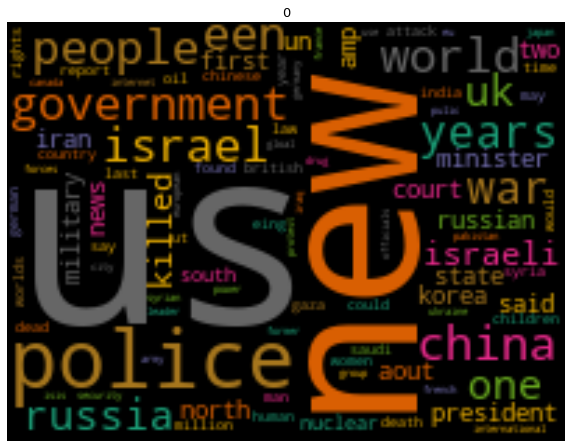

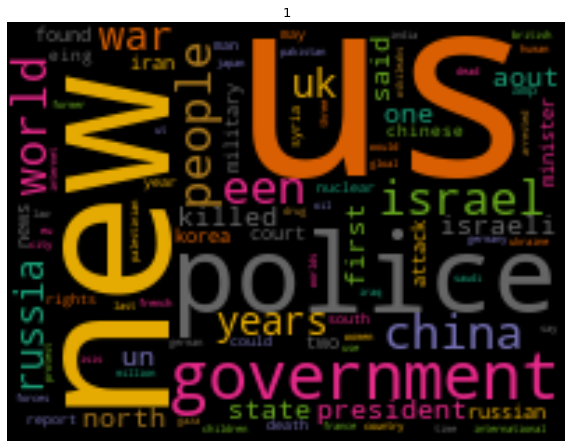

In [128]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,label in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[label].sort_values(ascending=False),label)

### Observation
Suprisingly, the top words for labels that represents the decrease and increase of the are very similar which makes it hard to draw pattern conclusions. Maybe it makes sense that the words are similar which means that it is indeed pretty hard to predict the direction of the market resulting in the randomness and variability of stock market index.